In [174]:
# TEMPORAL: Forzar manualmente la sesión a usar (para desarrollo)
session_path = "../training_data/20250605_214355"

In [182]:
# Cell 1: Detect session path from environment or fallback to latest
import os
from pathlib import Path

session_path = os.environ.get("TSIS_SESSION_PATH")

if session_path:
    session_path = session_path.strip()
    if not Path(session_path).exists():
        print(f"⚠️ Path provided but does not exist: {session_path}")
        session_path = None

if not session_path:
    base = Path("..") / "training_data"

    if base.exists():
        all_dirs = sorted([d for d in base.iterdir() if d.is_dir()], reverse=True)
        if all_dirs:
            session_path = str(all_dirs[0])
            print(f"⚠️ TSIS_SESSION_PATH not set. Using latest session: {session_path}")
        else:
            raise FileNotFoundError("❌ No session folders found in training_data/")
    else:
        raise FileNotFoundError("❌ training_data folder does not exist. Check that it exists in the project root.")

print("✅ Cell 1 complete.")



⚠️ TSIS_SESSION_PATH not set. Using latest session: ../training_data/20250605_214355
✅ Cell 1 complete.


In [176]:
# TEMPORAL para test manual
#session_path = "../training_data/20250605_212309"


📁 Working on session: ../training_data/20250605_214355

Metadata:
{'region': {'height': 906, 'left': 302, 'top': 320, 'width': 1526},
 'timestamp': '20250605_214355'}
No transcription found.

📸 Screenshot preview:


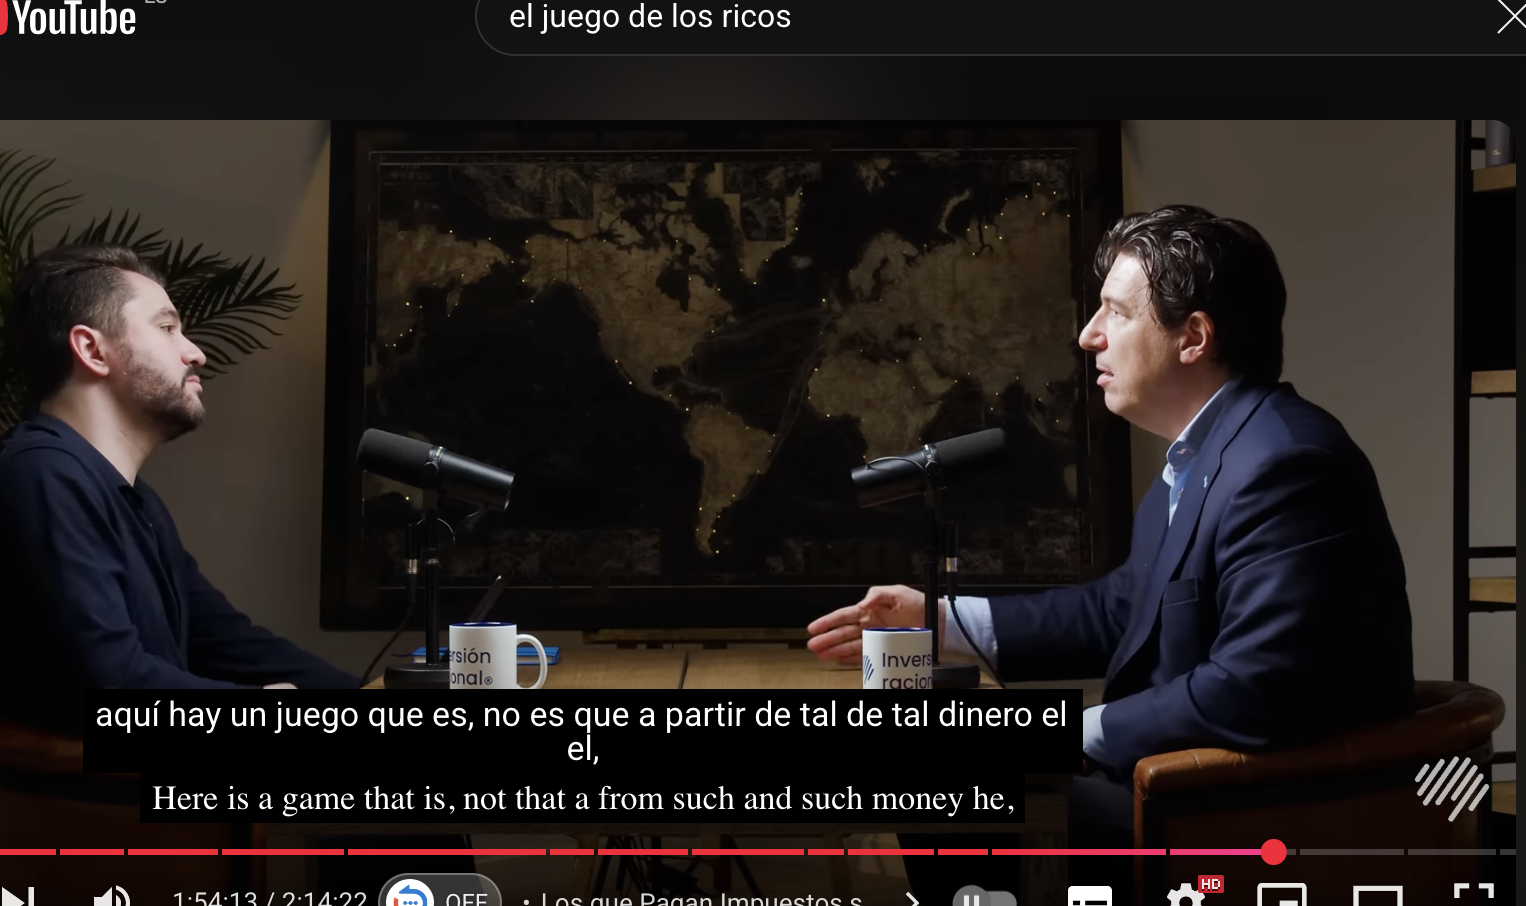


🎥 Video preview:



🔊 Audio preview:


In [180]:
# Cell 2: Validar ruta y cargar archivos
from pathlib import Path
import json
from pprint import pprint
from IPython.display import Image, display, HTML, Audio

path = Path(session_path)
if not path.exists():
    raise FileNotFoundError(f"❌ Path not found: {session_path}")

print(f"📁 Working on session: {session_path}")

with open(path / "metadata.json") as f:
    metadata = json.load(f)

print("\nMetadata:")
pprint(metadata)

try:
    with open(path / "transcription.txt") as f:
        transcript = f.read()
    print("\nTranscription preview:\n")
    print(transcript[:1000])
except FileNotFoundError:
    print("No transcription found.")

# Mostrar captura si existe
screenshot = next(path.glob("*.png"), None)
if screenshot and screenshot.exists():
    print("\n📸 Screenshot preview:")
    display(Image(filename=str(screenshot)))
else:
    print("No screenshot found.")

# Mostrar video si existe
video_file = next(path.glob("*.mov"), None)
if video_file and video_file.exists():
    print("\n🎥 Video preview:")
    display(HTML(f"""
    <video width='720' controls>
        <source src='{video_file}' type='video/mp4'>
        <source src='{video_file}' type='video/quicktime'>
        Tu navegador no puede reproducir este vídeo.
    </video>
    """))
else:
    print("No video file found.")

# Mostrar audio si existe (intenta también con .mp3)
audio_file = next(path.glob("*.mp3"), None) or next(path.glob("*.wav"), None)
if audio_file and audio_file.exists():
    print("\n🔊 Audio preview:")
    mime_type = "audio/mpeg" if audio_file.suffix == ".mp3" else "audio/wav"
    display(HTML(f"""
    <audio controls>
        <source src='{audio_file}' type='{mime_type}'>
        Tu navegador no puede reproducir este audio.
    </audio>
    """))
else:
    print("No audio file found.")


In [178]:
# Celda temporal para crear jsons si no existen
from pathlib import Path
import json

path = Path(session_path)

kaizen_template = {
    "puntuaciones_kaizen": {
        "precision_entrada": None,
        "estructura_clara": None,
        "riesgo_controlado": None,
        "contexto_macro_apoyaba": None
    },
    "etiquetas_binarias": {
        "vela_delta": None,
        "absorcion_detectada": None,
        "fallo_de_maximos": None,
        "entrada_con_flujo": None
    },
    "emocion_detectada": None,
    "comentario_trader": "",
    "probabilidad_modelo_IA": None
}

emotion_template = {
    "antes": None,
    "durante": None,
    "despues": None
}

(path / "kaizen.json").write_text(json.dumps(kaizen_template, indent=4))
(path / "emotion.json").write_text(json.dumps(emotion_template, indent=4))

print("✅ JSONs creados manualmente.")


✅ JSONs creados manualmente.


In [179]:
# Cell 3: Start labeling interface
import sys
sys.path.append("..")  # Sube un nivel desde notebooks/
from label_entry_widgets import lanzar_formulario as start_labeling_ui
from pathlib import Path
import json

path = Path(session_path)
if not (path / "kaizen.json").exists():
    raise FileNotFoundError("❌ kaizen.json not found in session folder.")
if not (path / "emotion.json").exists():
    raise FileNotFoundError("❌ emotion.json not found in session folder.")

start_labeling_ui()

HTML(value='<h3>🧠 Etiquetado Kayzen</h3>')

HTML(value='<b>Estrategia 0</b>')

HTML(value='<b>Estrategia 2</b>')

HTML(value='<b>Intradía</b>')

Button(button_style='success', description='Guardar etiquetas', style=ButtonStyle())

Output()